In [1]:
# USAGE
# python color_kmeans.py --image images/jp.png --clusters 3

# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import argparse
import color.utils as utils
import cv2
import numpy as np

In [2]:
# construct the argument parser and parse the arguments
'''
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required = True, help = "Path to the image")
ap.add_argument("-c", "--clusters", required = True, type = int,
    help = "# of clusters")
args = vars(ap.parse_args())
'''

'\nap = argparse.ArgumentParser()\nap.add_argument("-i", "--image", required = True, help = "Path to the image")\nap.add_argument("-c", "--clusters", required = True, type = int,\n    help = "# of clusters")\nargs = vars(ap.parse_args())\n'

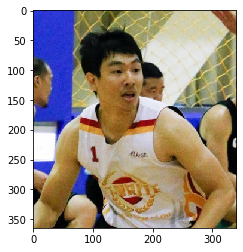

In [3]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
oriImg = cv2.imread('C:/Users/shing/project/face_data/Test/test.JPG')
plt.imshow(oriImg[:,:,[2,1,0]])

In [25]:
cv2.rectangle(oriImg, (120,150), (200, 250), (0,255,0), 4)
cv2.imshow("Result", oriImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

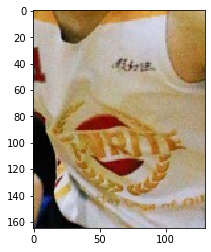

In [4]:
part_image = oriImg[200:,100:230]
plt.imshow(part_image[:,:,[2,1,0]])

(165, 130, 3)


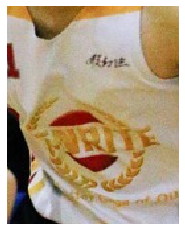

In [5]:

image = cv2.cvtColor(part_image, cv2.COLOR_BGR2RGB)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)
print(image.shape)

In [6]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

(21450, 3)


In [7]:
# cluster the pixel intensities
clt = KMeans(n_clusters = 5)
clt.fit(image)
 


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
print(clt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [12]:
clt.cluster_centers_

array([[194.01936972, 187.12528824, 183.43382014],
       [112.51797176,  55.33311938,  25.28818999],
       [180.57623972, 160.85958632, 124.91978255],
       [  9.64782965,   9.04258804,  12.2972973 ],
       [168.88213668, 126.38775952,  60.84472318]])

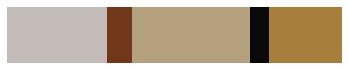

In [13]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = utils.centroid_histogram(clt)
bar = utils.plot_colors(hist, clt.cluster_centers_)
 
# show our color bart

plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()


In [10]:
#顏色比重
hist

array([0.30331002, 0.07254079, 0.35170163, 0.05692308, 0.21552448])

In [11]:
#找出顏色比重最重的hist index
color_idx = np.where(hist==np.max(hist))
print(clt.cluster_centers_[color_idx].flatten())

[180.57623972 160.85958632 124.91978255]


In [13]:
#主色為RDB為: clt.cluster_centers_[color_idx]
color = clt.cluster_centers_[color_idx].flatten().tolist()
print(color)

[244.62988505747344, 233.93354231974644, 229.72163009404977]


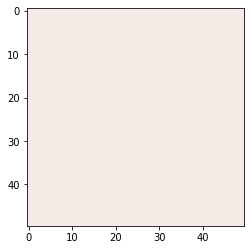

In [14]:
bar = np.zeros((50, 50, 3), dtype="uint8")
cv2.rectangle(bar, (0, 0), (50, 50),color, -1)
plt.imshow(bar)
plt.show()

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('C:/Users/shing/Desktop/player_info.csv', names =('Team','Num','Name','R','G','B'))  
print(df)  

  Team  Num   Name    R    G    B
0    A    1   John  245  232  230
1    A   25    Tim  243  233  232
2    A   38  David  244  234  231
3    B   17   Owen   27   48  157
4    B    9    Tom   28   49  156


In [17]:
#找A/B team的RGB的中位數
RDB_med = df.groupby('Team').median()
print(RDB_med)

       Num      R      G      B
Team                           
A     25.0  244.0  233.0  231.0
B     13.0   27.5   48.5  156.5


In [18]:
#找A/B team的RGB的中位數
R0_med, G0_med, B0_med = RDB_med.iloc[0,1:4]
R1_med, G1_med, B1_med = RDB_med.iloc[1,1:4]
print(R0_med, G0_med, B0_med)
print(R1_med, G1_med, B1_med)

244.0 233.0 231.0
27.5 48.5 156.5


In [19]:
#找出跟兩隊球衣顏色RDB中位數之差異值
color_dif0 = abs(color[0]-R0_med)+abs(color[1]-G0_med)+abs(color[2]-B0_med)
color_dif1 = abs(color[0]-R1_med)+abs(color[1]-G1_med)+abs(color[2]-B1_med)
print(color_dif0, color_dif1)

2.8417972831701093 475.7850574712697


In [20]:
if color_dif0 < color_dif1:
    team = RDB_med.index.values[0]
else:
    team = RDB_med.index.values[1]
print(team)

A


In [21]:
msg = ('A', 25)
print(str(msg))

('A', 25)


In [14]:
a = ['PEN', '1', 'Tony']
a1, a2, a3 = a
print(a1)

PEN
